# Исследование объявлений о продаже квартир

**Описание провекта:** 

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns

Для обзора данных воспользуемся методами head(), info() и describe().

In [2]:
data = pd.read_csv('real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Из таблицы выше видим, что данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Укажем какими символами разделять колонки и дроби. 

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t', decimal=',')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

In [5]:
data.describe()

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


**Вывод**

В данных встречаются следующие проблем:

* местами указан некорректный тип данных;
* присутствуют пропущенные значения;
* присутствуют нереалистичные значения;

Это только первоначальные наблюдения. Проведем подробную предобработку данных, чтобы выявить все аномалии. 

## Шаг 2. Предобработка данных

В рамках нашего исследования нет необходимости обработать каждый столбец датафрейма. Достаточно будет изучить те, которые могут повлиять на сам анализ. 

Для начала изменим тип данных в ряде колонок. Это нам поможет при дальнейшей обработке.   

In [6]:
def change_type(df, col, typ): 
    for elem in col:
        df[col] = df[col].astype(typ) 
    return df 


flt = ['last_price', 'total_area', 'ceiling_height', 
       'living_area', 'kitchen_area', 'airports_nearest', 
       'cityCenters_nearest', 'days_exposition'] 
bol = ['is_apartment'] 
order = ['float', 'bool'] 

for lst, typ in zip([flt, bol], order):
    change_type(data, lst, typ)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  object 
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

В датафрейме присутствуют аномалии и ошибки. Проверим важные для анализа колонки.

1. Проверим колонку **rooms** - число комнат.

In [8]:
data['rooms'].value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Большое количество комнат (больше 10) кажется подозрительным. Соотнесем количество комнат и площадь квартиры в квадратных метрах. Проверим, реалистичны ли значения. Выведем все квартиры, у которых количество комнат больше 10. 

In [9]:
data[data['rooms'] > 10].sort_values(by='rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,...,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,True,...,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4.0,168.3,2,True,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,True,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,True,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


Посмотрев полученную таблицу, можно сделать вывод, что такое соотношение количества комнат и площади возможно. В связи с этим оставим значения без изменений.

2. Проверим колонку **locality_name** - название населённого пункта.

In [10]:
data['locality_name'].sort_values()

1053     Бокситогорск
764      Бокситогорск
14637    Бокситогорск
8630     Бокситогорск
19186    Бокситогорск
             ...     
21898             NaN
22474             NaN
22717             NaN
22933             NaN
23214             NaN
Name: locality_name, Length: 23699, dtype: object

В колонке встречаются пропущенные значения. Посчитаем какую долю они составляют. 

In [11]:
round(data['locality_name'].isna().sum() / data['locality_name'].count(),4)

0.0021

Пропущенные значения составляют менее 1%. Заполним эти поля значением "unknown".

In [12]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  object        
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

3. Проверим колонку **floors_total** - всего этажей в доме.

In [13]:
data['floors_total'].sort_values()

8335     1.0
10817    1.0
14836    1.0
23498    1.0
17020    1.0
        ... 
22542    NaN
22656    NaN
22808    NaN
23590    NaN
23658    NaN
Name: floors_total, Length: 23699, dtype: object

В колонке встречаются пропущенные значения. Посчитаем какую долю они составляют. 

In [14]:
round(data['floors_total'].isna().sum() / data['floors_total'].count(),4)

0.0036

Пропущенные значения составляют менее 1%. Такая погрешность не является критичной. Удалим эти строки. 

In [15]:
data.dropna(subset=['floors_total'], inplace=True)

4. Проверим колонку **ceiling_height** -  высота потолков (м).

In [16]:
print('Максимальная высота потолка', data['ceiling_height'].max())
data['ceiling_height'].sort_values()

Максимальная высота потолка 100.0


22590    1.00
5712     1.20
16934    1.75
16884    2.00
2572     2.00
         ... 
23687     NaN
23690     NaN
23692     NaN
23695     NaN
23696     NaN
Name: ceiling_height, Length: 23613, dtype: float64

В колонке встречаются пропущенные и нереалистичные значения (слишком высокие потолки). 

Для начала определим долю пропущенных значений.

In [17]:
round(data['ceiling_height'].isna().sum() / data['ceiling_height'].count(),4)

0.629

Пропущенные значения занимают более 60%. Чтобы избавиться от них, заполним пропуски медианными значениями. Для этой цели воспользуемся группировкой. Группировать будем по этажности домов. Так как высота потолков в среднем одинакова, такая группировка не повлияет на дальнейший анализ. 

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform("median"))

Посчитаем количество пропущенных значений после проделанной замены.

In [19]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


После проведенной замены осталась одна строка с пропущенным значением. Обратим внимание, что у данной строки в колонке floors_total указано значение 33.0. Можем предположить, что в датафрейме больше нет домов с таким количеством этажей. Соответственно, мы не нашли медиану для него и поле осталось пустым. Проверим это. Выведем все дома с 33 этажами. 

In [20]:
data[data['floors_total'] == '33.0']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Да, мы сделали верное предположение. Такой дом только один.

Чтобы в дальнейшем у нас не возникло трудностей с расчетами, удалим эту строку.  

In [21]:
data = data[data['floors_total'] != '33.0']

В колонке ceiling_height есть еще одна проблема -- нереалистично большие и маленькие значения. Проверим сколько таких значений. За нормальные значения возьмем высоту потолков от 2 до 4 метров. Выведем эти строки.

In [22]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4)].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,True,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,True,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,True,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
1129,20,6695000.0,36.9,2018-09-28,1,4.06,5.0,22.0,2,True,...,7.20,NaN,Санкт-Петербург,21725.0,2990.0,1.0,596.0,1.0,866.0,110.0
6127,13,40000000.0,65.3,2017-07-13,2,4.10,5.0,45.0,2,True,...,12.00,2.0,Санкт-Петербург,23308.0,2380.0,1.0,473.0,1.0,283.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,14,4000000.0,98.0,2018-03-15,4,27.00,2.0,73.0,2,True,...,9.00,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
21377,19,4900000.0,42.0,2017-04-18,1,27.50,24.0,37.7,19,False,...,11.00,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,...,16.50,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,True,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Значений всего 79, что меньше 1%. Такими данными можно пренебречь. Оставим их без изменений. 

5. Проверим колонку **balcony** - число балконов.

In [23]:
data['balcony'].sort_values()

18495    0.0
21318    0.0
6308     0.0
13087    0.0
13086    0.0
        ... 
23692    NaN
23694    NaN
23695    NaN
23696    NaN
23698    NaN
Name: balcony, Length: 23612, dtype: object

В колонке встречаются пропущенные значения. Можем предположить, что, если человек не указал количество балконов, значит их нет. В таком случае заполним пропуски значением 0. 

In [24]:
data['balcony'].fillna(0, inplace=True)

После заполнения пропусков можем изменить типа данных.

In [25]:
data['balcony'] = data['balcony'].astype('float')
data['balcony'] = data['balcony'].astype('int')

6. Проверим колонку **living_area** - жилая площадь в квадратных метрах (м²).

In [26]:
data['living_area'].sort_values()

21758    2.0
13915    2.0
3242     3.0
23574    3.0
17582    5.0
        ... 
23642    NaN
23663    NaN
23670    NaN
23679    NaN
23697    NaN
Name: living_area, Length: 23612, dtype: float64

В колонке есть пропущенные значения. Так как у нас нет возможности уточнить значения, определим отношение жилой площади и площади кухни к общей площади квартиры, далее вычислим медианное значение.

In [27]:
living_area_median = ((data['living_area'] + data['kitchen_area']) / data['total_area']).median()
data['living_area'] = data['living_area'].fillna(living_area_median)

7. Проверим колонку **kitchen_area** - площадь кухни в квадратных метрах (м²).

In [28]:
data['kitchen_area'].sort_values()

20217    1.3
19642    2.0
11033    2.0
6262     2.0
16367    2.0
        ... 
23655    NaN
23663    NaN
23670    NaN
23679    NaN
23696    NaN
Name: kitchen_area, Length: 23612, dtype: float64

В колонке присутствуют пропущенные значения. Так как у нас нет возможности уточнить значения, определим отношение площади кухни к общей площади квартиры, далее вычислим медианное значение и заполним им пропуски. 

In [29]:
kitchen_area_median = (data['kitchen_area'] / data['total_area']).median()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)

8. Проверим колонку **days_exposition** - сколько дней было размещено объявление (от публикации до снятия).

In [30]:
data['days_exposition'].sort_values()

1632     1.0
13061    2.0
16053    2.0
16212    2.0
13573    3.0
        ... 
23684    NaN
23685    NaN
23694    NaN
23696    NaN
23698    NaN
Name: days_exposition, Length: 23612, dtype: float64

В колонке присутствуют пропущенные значения. У нас нет возможности получить более точную информацию, в связи с чем заполним пропуски медианным значением.

In [31]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()

1.В процессе предобработке данных были заменены пропущенные значения:
* **Название населенного пункта (locality_name)**: Пропущенные значения составляют менее 1%. Так как эти данные будут использоваться при дальнейшем анализе, оставить пропуски мы не смогли. Было принято решение заполнить эти поля значением "unknown".
* **Число этажей в доме (floors_total)**:  Пропущенные значения составляют менее 1%. Данные являются критичными, так как будут использоваться в дальнейшем анализе. Но, так как у нас нет возможности достаточно точно заменить пропущенные значения, было принято решение строки с пропущенными значениями удалить. 
* **Высота потолков (ceiling_height)**: Пропущенные значения составляли более 60%. Было принято решение заменить пропущенные значения на медиану для зданий конкретной этажности. 
* **Число балконов (balcony)**: Мы предположили, что отсутствие числа балконов говорит, что балконов нет. Заменили пропуски на значение 0. 
* **Жилая площадь и площадь кухни (living_area, kitchen_area)**: Так как у нас нет возможности уточнить значения в пропусках, было принято решение заполнить пропуски медианным значением. 
* **Длительность размещения объявления (days_exposition)**: Все пропущенные значения были заменены на медиану.

**Вывод:** Пропущенные значения были обработаны только в значимых для исследования колонках. В остальных изменения не вносились. Причиной появления ошибок могут быть две: 1. человеческий фактор; 2. техническая ошибка. 

2.Были заменены типы данных в следующих колонках:
* last_price
* total_area
* ceiling_height
* living_area
* kitchen_area
* airports_nearest
* cityCenters_nearest
* days_exposition
* balcony
* is_apartment
* first_day_exposition

**Вывод:** Были внесены изменения в типы данных тех столбцов, которые являются критичными для дальнейшего анализа, либо будут более удобен в визуальном плане. 

## Шаг 3. Расчёты и добавление результатов в таблицу

Для дальнейшего исследования нам необходимо добавить несколько новых колонок. 

1. **Цена квадратного метра**

Создадим новую колонку и назовем ее price_square_meter. Для расчета стоимости квадратного метра нам необходимы данные из колонок last_price и total_area. Данные округлим до одного значения после запятой.

In [32]:
data['price_square_meter'] = round(data['last_price'] / data['total_area'], 1)

2. **День недели, месяц и год публикации объявления**

Добавим новые колонки и назовем их weekday, month, year.

In [33]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

3. **Этаж квартиры**

Создадим новую колонку и внесем в него этажность квартир в следующем варианте: первый этаж, последний этаж, другой. Для этого напишем функцию. 

Для начала изменим тип данных на int. 

In [34]:
data['floors_total'] = data['floors_total'].astype('float')
data['floors_total'] = data['floors_total'].astype('int')

In [35]:
def total_floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['apartment_floor'] = data.apply(total_floor, axis = 1)

In [36]:
data.groupby('apartment_floor').size()

apartment_floor
другой       17362
первый        2914
последний     3336
dtype: int64

4. **Соотношение площади**

Создадим две новые колонки и внесем в них соотношение жилой и общей площади, и отношение площади кухни к общей площади. Назовем их living_and_total_area и kitchen_and_total_area. Данные округлим до одного значения после запятой. 

In [37]:
data['living_and_total_area'] = round(data['living_area'] / data['total_area'], 1)
data['kitchen_and_total_area'] = round(data['living_area'] / data['kitchen_area'], 1)

## Шаг 4. Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

**Изучим общую площадь.**

count    23612.000000
mean        60.338956
std         35.648761
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

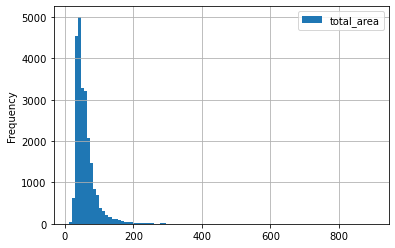

In [38]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True)
data['total_area'].describe()

Так как наибольшее распределение квартир в диапазоне от 0 до 200 м2, построим еще одно распределение. 

<AxesSubplot:ylabel='Frequency'>

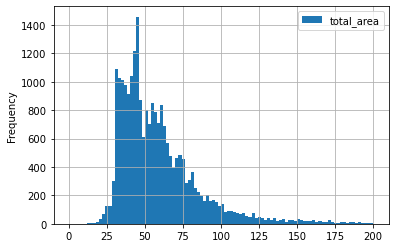

In [39]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, range = (0,200))

**Вывод:** Распределение данных нормальное, есть выбросы, но они не сильно влияют на данные. С помочью describe получили общее представление о данных. 

**Изучим стоимость.**

count    2.361200e+04
mean     6.540413e+06
std      1.090193e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

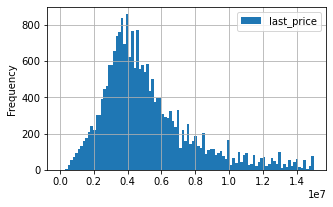

In [40]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()

**Вывод:** C данными все в порядке.  

**Изучим количество комнат.**

count    23612.000000
mean         2.071108
std          1.078386
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

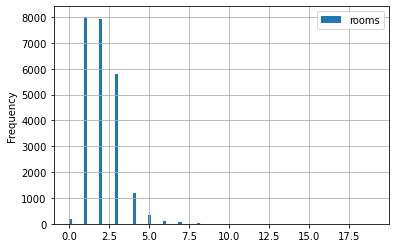

In [41]:
data.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True)
data['rooms'].describe()

**Вывод:** C данными все в порядке.  

**Изучим высоту потолков.**

count    23612.000000
mean         2.735917
std          0.996091
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

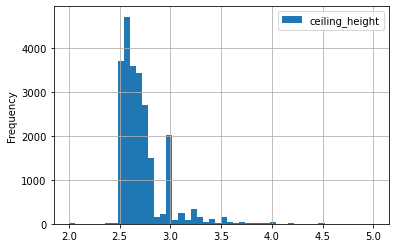

In [42]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, range = (2,5))
data['ceiling_height'].describe()

**Вывод:** C данными все в порядке.

**Общий вывод:** Из проведенного анализа видно, что квартира, выставленная на продажу, имеет следующие средние характеристики: это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, проданная по цене 4,65 млн рублей. 

**Изучим время продажи квартиры**. 

Чтобы визуально посмотреть, а также зафиксировать в числах заметные на графике нюансы распределения (среднее значение, количество и т.д.) используем метод describe(), выведем гистограмму методом hist() и диаграмму размаха методом boxplot.

count    23612.000000
mean       169.352617
std        206.488157
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

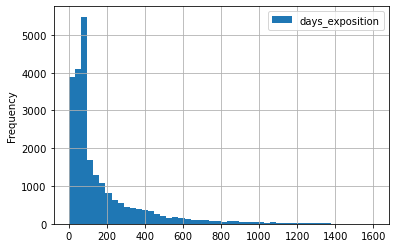

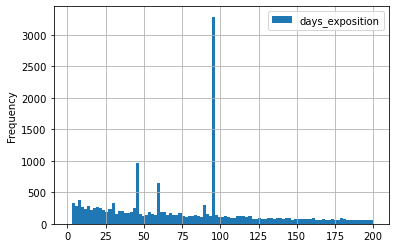

In [43]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
data['days_exposition'].describe()

<AxesSubplot:>

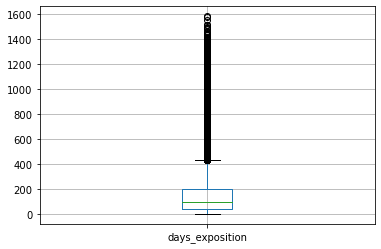

In [44]:
data.boxplot('days_exposition')

**Вывод:** Чаще всего продажа квартиры занимает 95 дней. Стоит обратить внимание, что четверть продаж осуществляются за 45 дней. Из данных выше видно, что встречаются очень быстрые сделки (продажи от 1 дня до месяца). Это наводит на мысли о мошеннической деятельности. Такие сделки необходимо тщательно проверить. Кроме того, если объект был продан только после 420 дней с момента публикации, это говорит об аномально долгой продаже. 

Как нам стало известно, в данных колонки days_exposition присутствуют аномалии и выбросы. Создадим новый датафрейм без выбросов и аномалий.

In [45]:
good_data = data.query('days_exposition > 30.0')
good_data = good_data.query('days_exposition < 420.0')
good_data.sort_values(by='days_exposition', ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,apartment_floor,living_and_total_area,kitchen_and_total_area
3723,4,3750000.0,37.0,2018-02-05,1,2.75,22,17.00,16,True,...,0.0,NaN,31.0,101351.4,0,2,2018,другой,0.5,1.9
8699,14,5150000.0,60.0,2017-08-08,2,2.55,5,32.50,5,True,...,0.0,NaN,31.0,85833.3,1,8,2017,последний,0.5,188.6
19861,9,6000000.0,53.9,2019-03-17,2,2.55,9,35.30,7,True,...,NaN,NaN,31.0,111317.3,6,3,2019,другой,0.7,4.0
17367,10,3450000.0,47.3,2018-06-19,2,2.55,7,26.60,1,True,...,0.0,NaN,31.0,72938.7,1,6,2018,первый,0.6,3.6
21128,20,5800000.0,58.1,2018-08-21,3,2.54,9,37.50,3,True,...,0.0,NaN,31.0,99827.9,1,8,2018,другой,0.6,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,8,1700000.0,70.0,2017-12-04,3,3.00,4,50.00,3,False,...,NaN,NaN,419.0,24285.7,0,12,2017,другой,0.7,5.6
7399,3,11000000.0,230.0,2018-03-01,5,2.50,2,0.75,2,True,...,NaN,NaN,419.0,47826.1,3,3,2018,последний,0.0,4.4
2569,11,12200000.0,75.9,2017-04-01,2,2.55,9,39.80,4,True,...,2.0,849.0,419.0,160737.8,5,4,2017,другой,0.5,2.4
894,16,5450000.0,62.3,2017-12-04,3,2.50,9,42.10,9,True,...,1.0,607.0,419.0,87479.9,0,12,2017,последний,0.7,5.1


Заново построим диаграмму размаха и гистограмму. 

count    17463.000000
mean       132.291817
std         92.241194
min         31.000000
25%         66.000000
50%         95.000000
75%        170.000000
max        419.000000
Name: days_exposition, dtype: float64

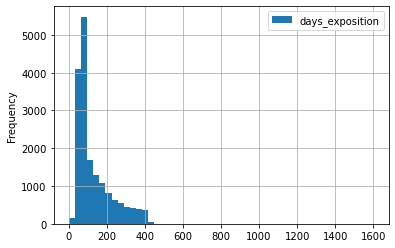

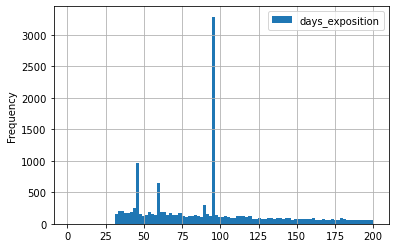

In [46]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
good_data['days_exposition'].describe()

<AxesSubplot:>

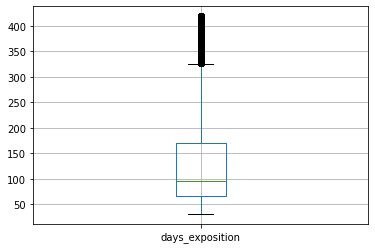

In [47]:
good_data.boxplot('days_exposition')

Готово. Аномалии и выбросы убраны.  

**Определим какие факторы больше всего влияют на стоимость квартиры**.

Для определения зависимости стоимости квадратного метра от площади, числа комнат, удалённости от центра, этажности и даты размещения воспользуемся матрицей корреляции и матрицей рассеивания.  

In [48]:
good_data_pivot_table = good_data.pivot_table(index='last_price', 
values = ['rooms','total_area','cityCenters_nearest','apartment_floor', 'weekday', 'month', 'year'])
corr_matrix = good_data_pivot_table.corr() # корреляция
corr_matrix

,cityCenters_nearest,month,rooms,total_area,weekday,year
cityCenters_nearest,1.000000,0.011020,-0.365375,-0.371047,-0.026924,0.049466
month,0.011020,1.000000,0.031060,0.026698,0.014843,-0.299276
rooms,-0.365375,0.031060,1.000000,0.794538,-0.034548,-0.047605
total_area,-0.371047,0.026698,0.794538,1.000000,-0.005865,-0.068409
weekday,-0.026924,0.014843,-0.034548,-0.005865,1.000000,-0.032513
year,0.049466,-0.299276,-0.047605,-0.068409,-0.032513,1.000000


<AxesSubplot:>

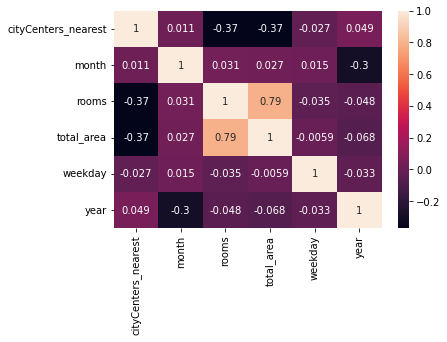

In [49]:
# тепловая карта

sns.heatmap(corr_matrix, annot=True)

array([[<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='month', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='weekday', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='year', ylabel='cityCenters_nearest'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='rooms', ylabel='month'>,
        <AxesSubplot:xlabel='total_area', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='month', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='

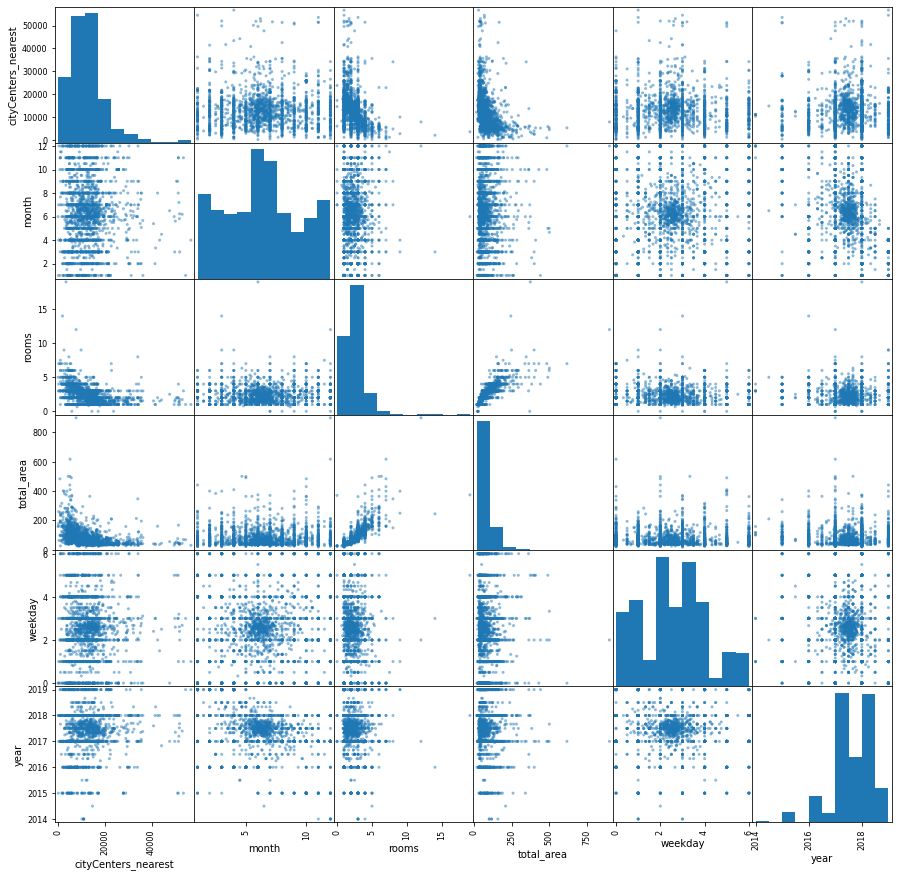

In [50]:
# матрица рассеяния

pd.plotting.scatter_matrix(good_data_pivot_table, figsize=(15, 15))

**1. Зависимость стоимости квартиры от числа комнат.**

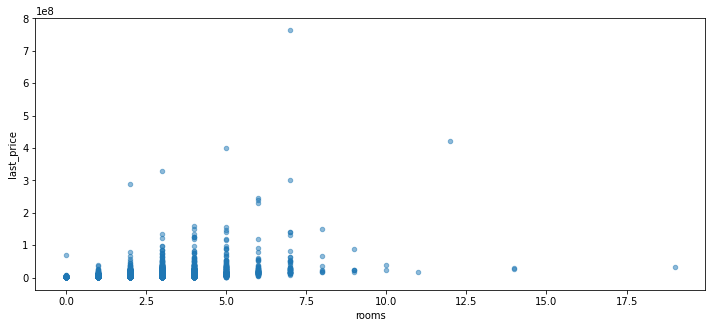

In [51]:
good_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5, figsize=(12, 5));

,rooms,median
rooms,1.00000,0.32316
median,0.32316,1.00000


,rooms,median
0,0,2775000.0
1,1,3599999.5
2,2,4750000.0
3,3,6190000.0
4,4,8990000.0
5,5,14000000.0
6,6,18777000.0
7,7,25000000.0
8,8,22190000.0
9,9,23500000.0


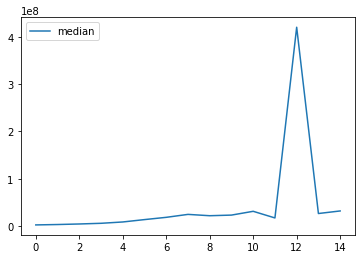

In [52]:
price_and_rooms = good_data.pivot_table(index ='rooms', values = 'last_price', aggfunc = ['median'])
price_and_rooms.columns = ['median']
price_and_rooms = price_and_rooms.reset_index()
display(price_and_rooms.corr())
price_and_rooms.plot(y = 'median')
price_and_rooms.sort_values('rooms', ascending = True)

Из данных выше видно, что зависимость сохраняется для квартир от 0 до 7 комнат. Проверим сколько всего квартир с количеством комнат больше 7.

In [53]:
good_data[(good_data['rooms'] >= 8) & (good_data['rooms'] <= 19)].sort_values('rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,apartment_floor,living_and_total_area,kitchen_and_total_area
12447,8,19900000.0,210.3,2016-04-18,8,3.30,5,144.60,2,True,...,0.0,NaN,102.0,94626.7,0,4,2016,другой,0.7,6.1
20788,7,18000000.0,245.0,2017-04-06,8,3.54,5,155.00,2,True,...,1.0,340.0,357.0,73469.4,3,4,2017,другой,0.6,899.4
10569,13,36900000.0,347.5,2017-09-14,8,3.00,4,160.00,1,True,...,2.0,241.0,249.0,106187.1,3,9,2017,первый,0.5,4.0
8758,5,16100000.0,150.0,2018-07-10,8,2.92,5,107.00,1,True,...,0.0,NaN,95.0,107333.3,1,7,2018,первый,0.7,14.9
21990,20,68000000.0,373.1,2018-09-08,8,2.80,8,176.20,8,True,...,3.0,691.0,234.0,182256.8,5,9,2018,последний,0.5,6.0
4435,13,22190000.0,191.2,2017-12-05,8,2.90,6,115.80,1,True,...,2.0,155.0,115.0,116056.5,1,12,2017,первый,0.6,23.2
7857,11,150000000.0,230.0,2017-10-25,8,2.80,8,220.00,8,True,...,0.0,NaN,135.0,652173.9,2,10,2017,последний,1.0,1276.5
8860,12,17000000.0,235.0,2018-07-14,9,3.00,6,0.75,3,True,...,0.0,NaN,90.0,72340.4,5,7,2018,другой,0.0,4.4
9550,10,23500000.0,313.0,2017-02-13,9,3.20,6,179.20,5,True,...,0.0,NaN,95.0,75079.9,0,2,2017,другой,0.6,13.6
13019,0,22250000.0,249.9,2019-04-23,9,3.20,5,157.00,5,True,...,0.0,NaN,95.0,89035.6,1,4,2019,последний,0.6,12.7


**Вывод:** Из данных выше видно, что зависимость сохраняется для квартир от 0 до 7 комнат. Далее стоимости квартиры колеблется то в одну, то в другую сторону. Квартир с количеством комнат больше 7 немного. Можно предположить, что такие квартиры сложнее оценивать и продать. В связи с этим стоимости квадратного метра  этих квартир не имеют прямой зависимости от количества комнат. 
Также стоит обратить внимание, на корреляции Пирсона, она составила всего 0.3, что говорит о слабой зависимости. 

**2. Зависимость стоимости квартиры от площади.**

,total_area,median
total_area,1.000000,0.720461
median,0.720461,1.000000


,total_area,median
0,12.0,2400000.0
1,13.0,1400000.0
2,15.0,1725000.0
3,17.0,1500000.0
4,17.6,3400000.0
...,...,...
1818,517.0,50000000.0
1819,618.0,300000000.0
1820,631.0,140000000.0
1821,631.2,140000000.0


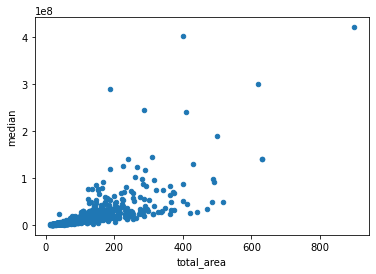

In [54]:
price_and_total_area = good_data.pivot_table(index ='total_area', values = 'last_price', aggfunc = ['median'])
price_and_total_area.columns = ['median']
price_and_total_area = price_and_total_area.reset_index()
display(price_and_total_area.corr())
price_and_total_area.plot(x='total_area', y = 'median', kind='scatter')
price_and_total_area.sort_values('total_area', ascending = True)

**Вывод:** На графике можно наблюдать, что зависимость стоимости квартиры и общей площади есть. С увеличением площадь стоимость квартир повышается. Исходя из таблицы корреляций, коэффициент Пирсона составил 0.72, что означает весьма сильную зависимости между показателями.

**3. Зависимость стоимости квартиры от удалённости от центра.**

,cityCenters_nearest,median
cityCenters_nearest,1.000000,-0.234754
median,-0.234754,1.000000


,cityCenters_nearest,median
0,181.0,31099000.0
1,208.0,5800000.0
2,215.0,10990000.0
3,287.0,9590000.0
4,291.0,11500000.0
...,...,...
6460,61495.0,3200000.0
6461,62454.0,3200000.0
6462,64857.0,3650000.0
6463,65764.0,4000000.0


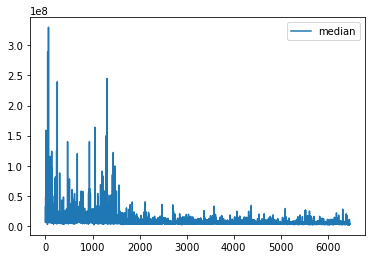

In [55]:
price_and_cityCenters_nearest = good_data.pivot_table(index ='cityCenters_nearest', values = 'last_price', aggfunc = ['median'])
price_and_cityCenters_nearest.columns = ['median']
price_and_cityCenters_nearest = price_and_cityCenters_nearest.reset_index()
display(price_and_cityCenters_nearest.corr())
price_and_cityCenters_nearest.plot(y = 'median')
price_and_cityCenters_nearest.sort_values('cityCenters_nearest', ascending = True)

**Вывод:** Из графика выше видна явная зависимость стоимости квартиры и удалённости от центра. Чем ближе к центру, тем выше стоимость. Стоит обратить внимание на коэффициент корреляции, который в данном случае лишь -0.23 (есть обратная зависимость, но она не слишком сильная).

**4. Зависимость стоимости квартиры от этажности.**

In [56]:
price_and_apartment_floor = good_data.pivot_table(index ='apartment_floor', values = 'last_price', aggfunc = ['median'])
price_and_apartment_floor.columns = ['median']
price_and_apartment_floor = price_and_apartment_floor.reset_index()
display(price_and_apartment_floor.corr())
price_and_apartment_floor.sort_values('median', ascending = False)

,median
median,1.0


,apartment_floor,median
0,другой,4870000.0
2,последний,4300000.0
1,первый,3900000.0


<AxesSubplot:xlabel='apartment_floor', ylabel='median'>

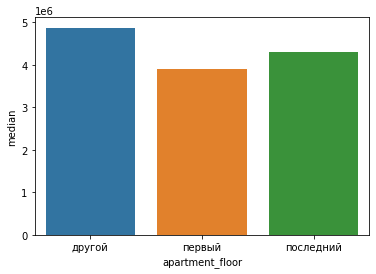

In [57]:
sns.barplot(data=price_and_apartment_floor, x="apartment_floor", y="median")

**Вывод:** В данном случае четко видно, что квартиры на первом этаже стоят дешевле, чем остальные. Также видно, что самые дорогие квартиры находятся между первым и последним этажами.  

**5. Зависимость стоимости квартиры от даты размещени.**

5.1 Вначале проверим зависимость стоимости квартиры от дня недели.

,weekday,median
weekday,1.000000,-0.927434
median,-0.927434,1.000000


,weekday,median
1,1,4700000.0
2,2,4700000.0
0,0,4685000.0
3,3,4600000.0
4,4,4600000.0
5,5,4550000.0
6,6,4540000.0


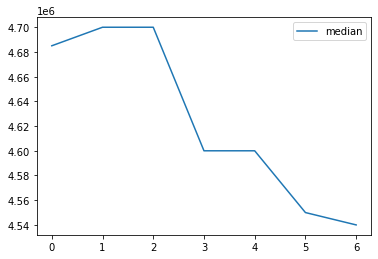

In [58]:
price_and_weekday = good_data.pivot_table(index ='weekday', values = 'last_price', aggfunc = ['median'])
price_and_weekday.columns = ['median']
price_and_weekday = price_and_weekday.reset_index()
display(price_and_weekday.corr())
price_and_weekday.plot(y = 'median')
price_and_weekday.sort_values('median', ascending = False)

5.2 Проверим зависимость цены от месяца. 

,month,median
month,1.000000,0.111214
median,0.111214,1.000000


,month,median
10,11,4790000.0
3,4,4780000.0
2,3,4700000.0
6,7,4690000.0
8,9,4690000.0
1,2,4650000.0
11,12,4616000.0
0,1,4600000.0
7,8,4600000.0
9,10,4600000.0


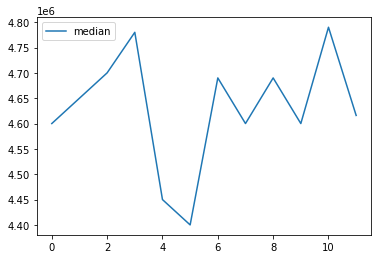

In [59]:
price_and_month = good_data.pivot_table(index ='month', values = 'last_price', aggfunc = ['median'])
price_and_month.columns = ['median']
price_and_month = price_and_month.reset_index()
display(price_and_month.corr())
price_and_month.plot(y = 'median')
price_and_month.sort_values('median', ascending = False)

5.3 Проверим зависимость цены от года. 

,year,median
year,1.000000,-0.650306
median,-0.650306,1.000000


,year,median
0,2014,17525000.0
1,2015,5200000.0
5,2019,5200000.0
4,2018,4650000.0
2,2016,4500000.0
3,2017,4500000.0


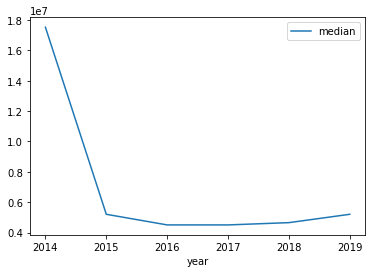

In [60]:
price_and_year = good_data.pivot_table(index ='year', values = 'last_price', aggfunc = ['median'])
price_and_year.columns = ['median']
price_and_year = price_and_year.reset_index()
display(price_and_year.corr())
price_and_year.plot(y = 'median', x = 'year')
price_and_year.sort_values('median', ascending = False)

**Вывод:** 

* Из данных выше видно, что зависимость стоимости квартиры от дня недели есть. Квартиры, выставленные на продажу во вторник и среду, стоят дороже в отличие от остальных дней недели. Коэффициент корреляции Пирсона равен -0.92, что говорит о сильной корреляции.

* Зависимость стоимости квартиры от месяца размещения слабая, коэффициент корреляции Пирсона равен 0.1.

* Зависимость стоимости квартиры от года размещения есть. Стоимости квадратного метра квартир, выставленные на продажу в 2014 году, стоят дороже, чем в других годах. Коэффициент корреляции Пирсона равен -0.65, что говорит о существенной корреляции.

**Выясним в каких населенных пунктах самые высокие и низкие цены на жилье.** 

Для начала, выберем 10 населённых пунктов с наибольшим числом объявлений. 

In [61]:
top_10_locations = good_data.groupby('locality_name').size().sort_values(ascending=False).head(10)
top_10_locations

locality_name
Санкт-Петербург      11325
посёлок Мурино         361
посёлок Шушары         331
Всеволожск             315
Пушкин                 279
Колпино                249
посёлок Парголово      244
Гатчина                232
деревня Кудрово        212
Выборг                 190
dtype: int64

In [62]:
# создадим лист с названиями населенных пунктов

top_10_loc = top_10_locations.index.to_list()
top_10_loc

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [63]:
# создадим новый фрейм с топ-10 населенными пунктами

top_10_locations = good_data.query('locality_name in @top_10_loc')
top_10_locations

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,apartment_floor,living_and_total_area,kitchen_and_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2.0,755.0,95.0,120370.4,3,3,2019,другой,0.5,2.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,True,...,0.0,NaN,81.0,82920.8,1,12,2018,первый,0.5,1.7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,0.3,0.8
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,True,...,0.0,NaN,155.0,99195.7,3,11,2017,другой,0.3,0.7
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,0.75,22,True,...,0.0,NaN,95.0,110544.7,3,4,2019,другой,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2350000.0,35.60,2016-06-23,1,2.50,5,17.00,4,False,...,NaN,NaN,40.0,66011.2,3,6,2016,другой,0.5,2.0
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.40,17,True,...,0.0,NaN,95.0,147586.2,4,11,2018,другой,0.5,4.6
23686,8,3300000.0,31.00,2017-04-29,1,2.55,9,18.00,6,True,...,1.0,317.0,193.0,106451.6,5,4,2017,другой,0.6,2.8
23687,6,3200000.0,39.00,2017-12-16,1,2.55,9,20.00,6,True,...,0.0,NaN,38.0,82051.3,5,12,2017,другой,0.5,1.8


Рассчитаем среднюю цену квартиры в этих населённых пунктах. 

In [64]:
pd.options.display.float_format = '{:.2f}'.format # числа будут выводиться с двуми знаками после запятой
top_10_locations.groupby('locality_name')['last_price'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург     8204591.57
Пушкин              6308931.29
посёлок Парголово   4568734.87
деревня Кудрово     4268723.46
посёлок Шушары      4139625.38
Колпино             4099840.35
Всеволожск          3871810.23
посёлок Мурино      3631611.80
Гатчина             3469932.33
Выборг              3303926.32
Name: last_price, dtype: float64

**Вывод:** Из проведенного анализа можно сделать вывод, что квартиры с самой дорогой стоимостью находится в Санкт-Петербурге (стоимость 8204591.57), а с наименьшей стоимостью в городе Выборг (стоимость 3303926.32). 

**Изучите предложения квартир в городе Санкт-Петербург**.

Воспользуемся уже созданным нами ранее датафреймом top_10_locations. Оставим в нем информацию только о городе Санкт-Петербург. 

In [65]:
top_10_locations = top_10_locations.loc[(top_10_locations['locality_name'] == 'Санкт-Петербург')]

Создадим новую колонку city_centers_km с расстоянием до центра в километрах. Полученные данные округлите до целых значений.

In [66]:
top_10_locations['city_centers_km'] = round(top_10_locations['cityCenters_nearest'] / 1000)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15148\3006983775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_locations['city_centers_km'] = round(top_10_locations['cityCenters_nearest'] / 1000)


В колонке city_centers_km есть пропущенные значения. Посчитаем их процентное соотношение. 

In [67]:
round(top_10_locations['city_centers_km'].isna().sum() / top_10_locations['city_centers_km'].count(),4)

0.0045

Результат -- меньше половины процента. Такие данные не повлияют на результат исследования. Заменим их на значение 0.

In [68]:
top_10_locations['city_centers_km'] = top_10_locations['city_centers_km'].fillna(0)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15148\2769593383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_locations['city_centers_km'] = top_10_locations['city_centers_km'].fillna(0)


Изменим тип данных в колонке city_centers_km на int.

In [69]:
top_10_locations['city_centers_km'] = top_10_locations['city_centers_km'].astype('int')

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15148\1411927928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_locations['city_centers_km'] = top_10_locations['city_centers_km'].astype('int')


Постройте график: он должен показывать, как стоимости квадратного метра зависит от удалённости от центра. 

<AxesSubplot:xlabel='city_centers_km'>

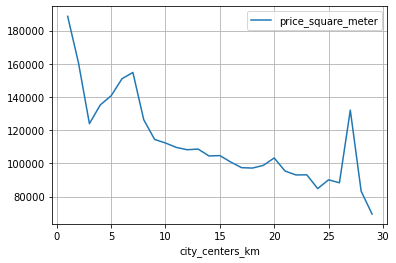

In [70]:
pivot_table_km = top_10_locations.query('city_centers_km != 0').pivot_table(index = 'city_centers_km', values = 'price_square_meter', aggfunc = 'mean')
pivot_table_km.plot(grid = True)

**Вывод:** Цена за квадратный метр квартиры в Питере начинает резко падать от 9 км от центра, можно принять эту зону за центр города. При этом на 26 метрах имеется скачок цен. 

Выделим сегмент квартир в центре и проанализируем их. За радиус возьмем 9 км. 

In [71]:
center_spb_data = top_10_locations.query('city_centers_km <= 9')

**Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.**

count   3404.00
mean      87.11
std       57.54
min       12.00
25%       52.48
50%       73.00
75%      102.26
max      900.00
Name: total_area, dtype: float64

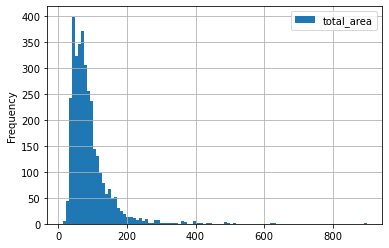

In [72]:
# площадь

center_spb_data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True)
center_spb_data['total_area'].describe()

count        3404.00
mean     13575723.67
std      24172389.60
min       1800000.00
25%       6000000.00
50%       8600000.00
75%      13500000.00
max     763000000.00
Name: last_price, dtype: float64

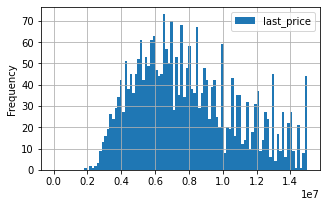

In [73]:
# цена

center_spb_data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
center_spb_data['last_price'].describe()

count   3404.00
mean       2.69
std        1.39
min        0.00
25%        2.00
50%        3.00
75%        3.00
max       19.00
Name: rooms, dtype: float64

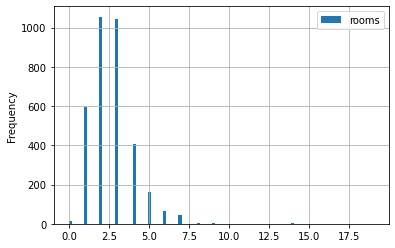

In [74]:
# число комнот

center_spb_data.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True)
center_spb_data['rooms'].describe()

count   3404.00
mean       2.93
std        0.60
min        2.00
25%        2.65
50%        2.90
75%        3.08
max       32.00
Name: ceiling_height, dtype: float64

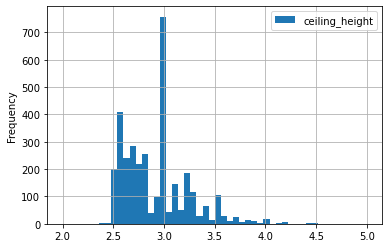

In [75]:
# высота потолков

center_spb_data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, range = (2,5))
center_spb_data['ceiling_height'].describe()

**Общий вывод:** Из графиков выше видно, что распределение данных является нормальным. Местами встречаются выбросы, но они не сильно влияют на данные. Портрет среднестатистической квартиры: 3-комнатная квартира (1-комнатные квартиры встречаются реже остальных) площадью 73 кв. м с потолками 2,9 м, проданная по цене 8,6 млн рублей.

**1. Зависимость стоимости квадратного метра от числа комнат.**

In [76]:
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms

,mean,count,median
rooms,,,
0,8908600.00,15,4280000.00
1,6038017.03,593,5250000.00
2,9304367.96,1055,7400000.00
3,13859783.94,1044,9900000.00
4,18959645.97,406,12427000.00
5,27608306.02,164,14990000.00
6,35205547.33,66,19500000.00
7,57453703.74,47,25000000.00
8,49031666.67,6,21045000.00


Построим график методом plot. Для анализа отбросим квартиры, количество которых меньше 47. Отсортируем данные по убыванию. 

,mean,count,median
rooms,,,
1,6038017.03,593,5250000.00
2,9304367.96,1055,7400000.00
3,13859783.94,1044,9900000.00
4,18959645.97,406,12427000.00
5,27608306.02,164,14990000.00
6,35205547.33,66,19500000.00
7,57453703.74,47,25000000.00


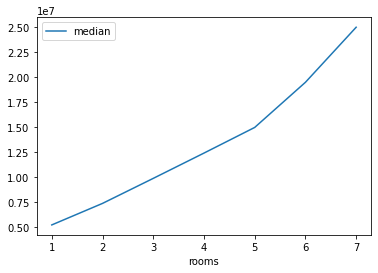

In [77]:
center_spb_rooms.query('count >= 47').plot(y = 'median')
center_spb_rooms.query('count >= 47').sort_values('rooms', ascending = True)

**Вывод:** В центре Санкт-Петербурга наблюдается следующее: чем меньше комнат, тем дороже стоимость метра квадратного. В анализе всей выборки стоимость перестает стабильно увеличиваться для квартир с 8 комнатами и больше.

**2. Зависимость стоимости квартиры от этажности.**

In [78]:
center_spb_apartment_floor = center_spb_data.pivot_table(index = 'apartment_floor', values = 'last_price', aggfunc = ['median'])
center_spb_apartment_floor.columns = ['median']
center_spb_apartment_floor = center_spb_apartment_floor.reset_index()
center_spb_apartment_floor
center_spb_apartment_floor.sort_values('median', ascending = False)

,apartment_floor,median
2,последний,8945000.00
0,другой,8910131.00
1,первый,6337500.00


<AxesSubplot:xlabel='apartment_floor', ylabel='median'>

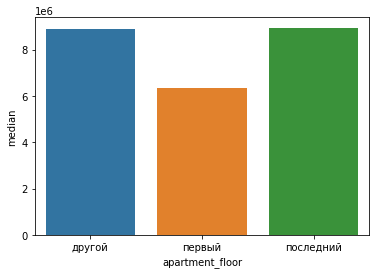

In [79]:
sns.barplot(data=center_spb_apartment_floor, x="apartment_floor", y="median")

**Вывод:** Есть небольшие отличия между квартирами во всей выборки от квартир в Санкт-Петербурге. Квартиры на первом этаже в среднем дешевле, чем на других этажах. Стоит заметить, что в Санкт-Петербурге самые дорогие квартиры расположены на последнем этаже. 

**3. Зависимость стоимости квартиры от удалённость от центра.**

,median
cityCenters_nearest,
181.00,31099000.00
208.00,5800000.00
215.00,10990000.00
287.00,9590000.00
291.00,11500000.00
...,...
9487.00,6600000.00
9488.00,3350000.00
9489.00,6950000.00


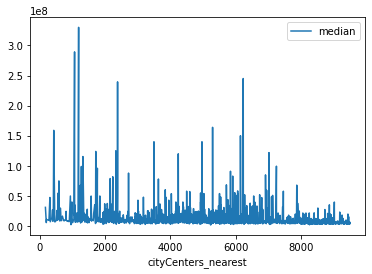

In [80]:
center_spb_nearest = center_spb_data.pivot_table(index ='cityCenters_nearest', values = 'last_price', aggfunc = ['median'])
center_spb_nearest.columns = ['median']
center_spb_nearest.plot(y = 'median')
center_spb_nearest.sort_values('cityCenters_nearest', ascending = True)

**Вывод:** Так как выборка по городу уже сделана, четкой зависимости нет. 

**4. Зависимость стоимости квартиры от даты размещени.**

4.1 Зависимость стоимости квартиры от дня недели размещения объявления.

,median
weekday,
0,8900000.00
6,8900000.00
2,8782500.00
3,8600000.00
4,8499000.00
5,8497500.00
1,8294500.00


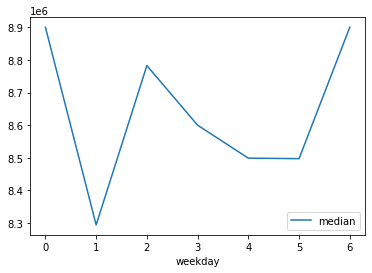

In [81]:
center_spb_weekday = center_spb_data.pivot_table(index ='weekday', values = 'last_price', aggfunc = ['median'])
center_spb_weekday.columns = ['median']
center_spb_weekday.plot(y = 'median')
center_spb_weekday.sort_values('median', ascending = False)

**Вывод:** Ситуация отличается от всей выборки. Самые высокие медианные цены в понедельник, среду и воскресенье, самые минимальные -- во вторник. Для общей выборки, квартиры, выставленные на продажу во вторник и среду, стоят дороже в отличие от остальных дней недели.

4.2 Зависимость стоимости квадратного метра от месяца размещения объявления.

,median
month,
11,9300000.00
3,9100000.00
9,9000000.00
7,8945261.00
8,8700000.00
1,8500000.00
2,8500000.00
6,8500000.00
10,8500000.00


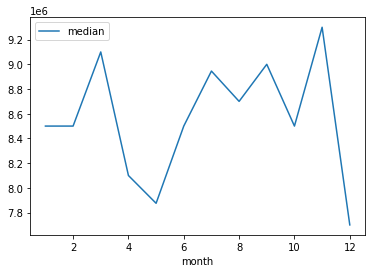

In [82]:
center_spb_month = center_spb_data.pivot_table(index ='month', values = 'last_price', aggfunc = ['median'])
center_spb_month.columns = ['median']
center_spb_month.plot(y = 'median')
center_spb_month.sort_values('median', ascending = False)

**Вывод:** Самая высокая стоимость квартир в Марте и Ноябре, самая низкая стоимость в Мае и Декабре, тогда как в общей выборке самая высокая стоимость в Апреле и Ноябрь. 

4.3 Зависимость стоимости квадратного метра от года размещения объявления.

,median
year,
2014,37949500.00
2015,10500000.00
2019,8995000.00
2016,8750000.00
2017,8500000.00
2018,8500000.00


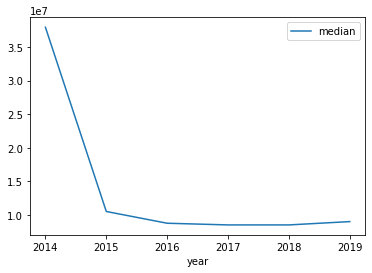

In [83]:
center_spb_year = center_spb_data.pivot_table(index ='year', values = 'last_price', aggfunc = ['median'])
center_spb_year.columns = ['median']
center_spb_year.plot(y = 'median')
center_spb_year.sort_values('median', ascending = False)

**Вывод:** Из полученного анализа видно, что квартиры, выставленные на продажу в 2014 году, стоят дороже, чем в других годах. Такая же картина наблюдается и для общей выборки.  

## Общий вывод

В наше распоряжение попали данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Мы провели тщательную предобработку данных, определили и изучили пропущенные значения, привели данные к нужным типам и определили возможные причины возникновения таких ошибок. В процессе исследования, для проведения анализа, добавили новые колонки, рассчитали цену квадратного метра, день недели, месяц и год публикации объявления, определили этажность квартир (первый, последний, другой), выявили соотношение жилой и общей площади, а также отношение площади кухни к общей. Мы провели тщательный исследовательский анализ данных: изучили площадь, цена, число комнат, высота потолков. Строили гистограммы и графики. Также мы определили временные нормы продажи квартиры и сделали выводы о возможных мошеннических схемах, определили какие факторы больше всего влияют на стоимость квартиры. Выявили в каких населенных пунктах больше всего объявлений, провели по ним анализ. Сравнили данные с изначальным датафреймом. 

В ходе исследования мы сделали следующие выводы:
1. Квартиры на первом этаже стоят дешевле, чем квартиры на любом другом этаже. Эта правдиво как для общей выборки, так и для объявлений в городе Санкт-Петербург. 
2. Квартиры, расположенные ближе к центру, стоят дороже, чем квартиры дальше от центра. 
3. И в центре Санкт-Петербурга и в близлежащих городах стоимость квартир в 2014 году была выше, чем в другие годы. 
4. В центре Санкт-Петербурга наблюдается следующее: чем меньше комнат, тем дороже стоимость метра квадратного. В анализе всей выборки стоимость стабильно увеличивается для квартир с количеством комнат от 0 до 7. 
5. Самыми «дорогими» для продажи месяцами являются: 
- для Санкт-Петербурга: Март;
- для общей выборки: Апрель и Ноябрь.
6. Самыми «дорогими» для продажи днями являются:
- для Санкт-Петербурга: суббота и пятница;
- для общей выборки: вторник и среду.
7. С увеличением площадь стоимость квартир повышается.